In [60]:
from __future__ import absolute_import

import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc

In [61]:
def plot_data(samples, centroids, clusters=None):
    """
    Plot samples and color it according to cluster centroid.
    :param samples: samples that need to be plotted.
    :param centroids: cluster centroids.
    :param clusters: list of clusters corresponding to each sample.
    """

    colors = ['blue', 'green', 'gold']
    assert centroids is not None

    if clusters is not None:
        sub_samples = []
        for cluster_id in range(centroids[0].shape[0]):
            sub_samples.append(np.array([samples[i] for i in range(samples.shape[0]) if clusters[i] == cluster_id]))
    else:
        sub_samples = [samples]

    plt.figure(figsize=(7, 5))

    for clustered_samples in sub_samples:
        cluster_id = sub_samples.index(clustered_samples)
        print(clustered_samples.shape)
        plt.plot(clustered_samples[:, 0], clustered_samples[:, 1], 'o', color=colors[cluster_id], alpha=0.75,
                 label='Data Points: Cluster %d' % cluster_id)

    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    plt.grid(True)
    tempx, tempy = [], []
    for mycentroid in centroids:
        tempx.append(mycentroid[:, 0])
        tempy.append(mycentroid[:, 1])

    for cluster_id in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    plt.legend(loc=4, framealpha=0.5)
    plt.show(block=True)

In [62]:
def find_closest_centroids(samples, centroids):
    """
    Find the closest centroid for all samples.

    :param samples: samples.
    :param centroids: an array of centroids.
    :return: a list of cluster_id assignment.
    """

    K=centroids.shape[0]
    
    return_array = np.zeros((samples.shape[0],1))
    
    result_matrix = np.zeros((samples.shape[0],K))
    #print(samples)
    
    for i in range(0,K):

        X_temp = samples - centroids[i,:]
        
        X_temp_square = X_temp**2
       
        result_matrix[:,i] = np.sum(X_temp_square, axis=1) 
        
   
    minimum = np.amin(result_matrix,axis=1)
    index = np.argmin(result_matrix, axis=1)
    
    return index
    
   

In [63]:
def choose_random_centroids(samples, K):
    """
    Randomly choose centorids.
    :param samples: samples.
    :param K: K as in K-means. Number of clusters.
    :return: an array of centroids.
    """
    centroids = np.zeros((K,samples.shape[1]))
    
    
    #randindex = np.random.randint(K,size = K)
    
    centroids = np.random.permutation(samples)[0:K]
    
    #print(centroids)
    
    #centroids = samples[randindex,:]
    
    #print(centroids.shape)
    #print(centroids)
    
    return centroids
    # -----------------------------------------------------------------
    #raise NotImplementedError("Replace this raise statement with "
    #                      "your code")
    # -----------------------------------------------------------------

In [64]:
def get_centroids(samples, clusters, K):
    """
    Find the centroid given the samples and their cluster.

    :param samples: samples.
    :param clusters: list of clusters corresponding to each sample.
    :return: an array of centroids.
    """
    
   
    #print(clusters)
    #print(samples)
    #print((samples[[0,1,2,3,4],:]))
    #print("Riken")
    
    centroids = np.zeros((K,samples.shape[1]))
    
    for i in range(0,K):
        index = np.nonzero(i==clusters)
        
        centroids[i,:] = np.sum(samples[index,:],axis = 1)/(np.nonzero(i==clusters))[0].shape[0]
        #print(centroids)
        
    return centroids
    

In [65]:
def run_k_means(samples, initial_centroids, n_iter):
    """
    Run K-means algorithm. The number of clusters 'K' is defined by the size of initial_centroids
    :param samples: samples.
    :param initial_centroids: a list of initial centroids.
    :param n_iter: number of iterations.
    :return: a pair of cluster assignment and history of centroids.
    """

    centroid_history = []
    current_centroids = initial_centroids
    clusters = []
    K = initial_centroids.shape[0]
    for iteration in range(n_iter):
        centroid_history.append(current_centroids)
        print("Iteration %d, Finding centroids for all samples..." % iteration)
        clusters = find_closest_centroids(samples, current_centroids)
        print("Recompute centroids...")
        current_centroids = get_centroids(samples, clusters, K)

    return clusters, centroid_history


(300, 2)


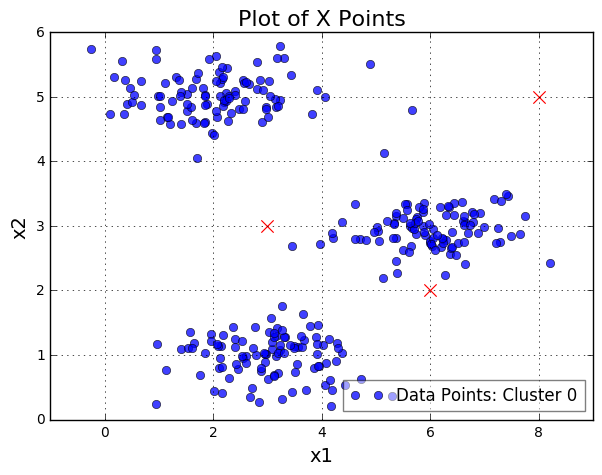

In [66]:
datafile = 'data/data2.mat'
mat = scipy.io.loadmat(datafile)
samples = mat['X']
    # samples contain 300 pts, each has two coordinates

    # Choose the initial centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
plot_data(samples, [initial_centroids])
clusters = find_closest_centroids(samples, initial_centroids)



(191, 2)
(103, 2)
(6, 2)


/Users/Riken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


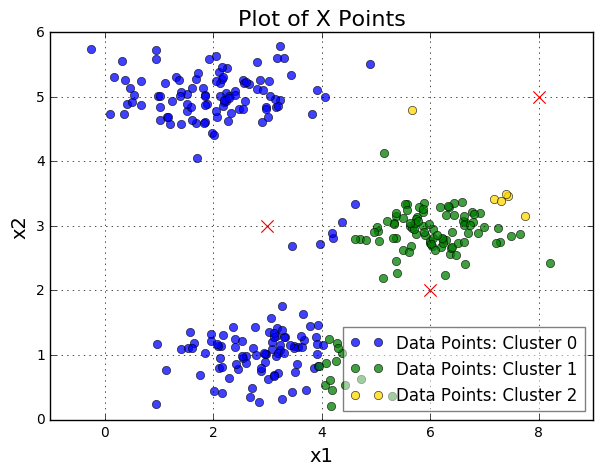

Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...
(98, 2)
(102, 2)
(100, 2)


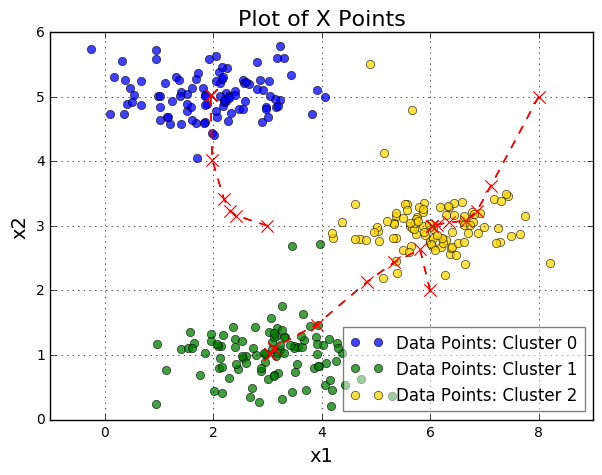

In [67]:
# you should see the output [0, 2, 1] corresponding to the
# centroid assignments for the first 3 examples.
#print(clusters[:3].flatten())
plot_data(samples, [initial_centroids], clusters)
clusters, centroid_history = run_k_means(samples, initial_centroids, n_iter=10)
plot_data(samples, centroid_history, clusters)

Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...
(102, 2)
(100, 2)
(98, 2)


/Users/Riken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


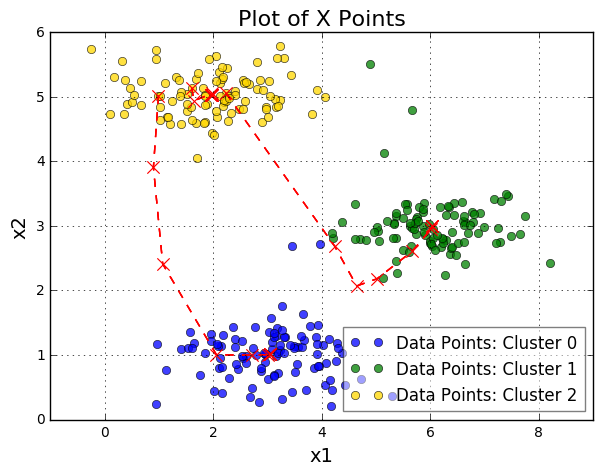

Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...
(98, 2)
(100, 2)
(102, 2)


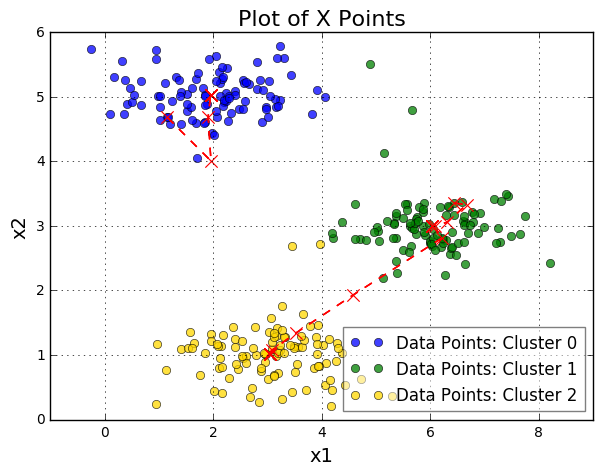

Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...
(102, 2)
(98, 2)
(100, 2)


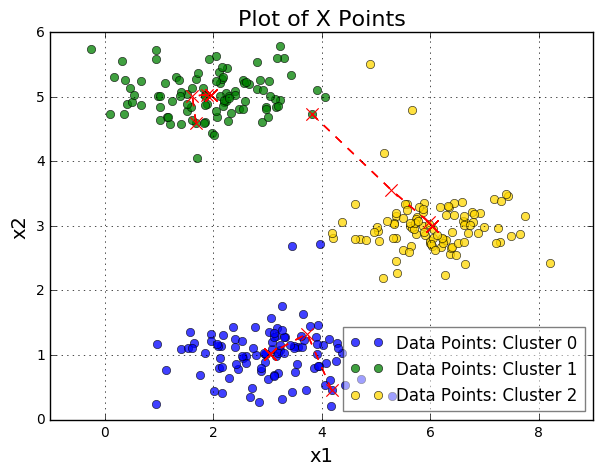

In [68]:
# Let's choose random initial centroids and see the resulting
# centroid progression plot.. perhaps three times in a row
for x in range(3):
        clusters, centroid_history = run_k_means(samples, choose_random_centroids(samples, K=3), n_iter=10)
        plot_data(samples, centroid_history, clusters)

In [100]:
import scipy
from scipy import misc

def main():
    datafile = 'data/bird_small.png'
    # This creates a three-dimensional matrix bird_small whose first two indices
    # identify a pixel position and whose last index represents red, green, or blue.
    bird_small = scipy.misc.imread(datafile)

    print("bird_small shape is ", bird_small.shape)
    plt.imshow(bird_small)
    # Divide every entry in bird_small by 255 so all values are in the range of 0 to 1
    bird_small = bird_small / 255.

    # Unroll the image to shape (16384,3) (16384 is 128*128)
    bird_small = bird_small.reshape(-1, 3)

    # Run k-means on this data, forming 16 clusters, with random initialization
    clusters, centroid_history = run_k_means(bird_small, choose_random_centroids(bird_small, K=16), n_iter=10)

    # Now I have 16 centroids, each representing a color.
    # Let's assign an index to each pixel in the original image dictating
    # which of the 16 colors it should be
    
    centroid = centroid_history[-1] 
    index = find_closest_centroids(bird_small, centroid)
    #clusters = None

    # Now loop through the original image and form a new image
    # that only has 16 colors in it
    
    clusters = centroid[index,:]
    
    print(clusters.shape)
    
    final_image = clusters
    #final_image = np.zeros((clusters.shape[0], 3))

    # Reshape the original image and the new, final image and draw them
    # To see what the "compressed" image looks like
    plt.figure()
    plt.imshow(bird_small.reshape(128, 128, 3))
    plt.figure()
    plt.imshow(final_image.reshape(128, 128, 3))

    plt.show()





bird_small shape is  (128, 128, 3)
Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...
(16384, 3)


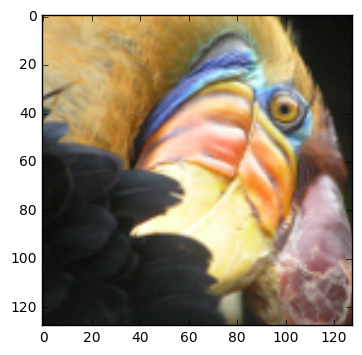

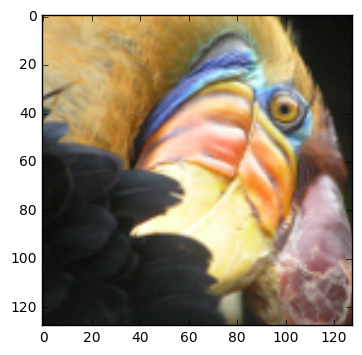

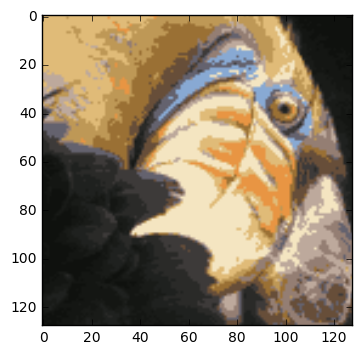

In [101]:
main()